# Results plot

In [1]:
%matplotlib inline

# Reading files
import h5py
import toml

# Scientific computing
import numpy as np
import pandas as pd

# Plot
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#plt.xkcd()
import seaborn as sns
sns.set()
sns.set_context('paper')

# Other
import os
import subprocess
from random import choice
import time as pytime
from IPython.display import display, clear_output

# Suppress NaturalNameWarning raised by HDFStore
import warnings
import tables
warnings.filterwarnings('ignore', category=tables.NaturalNameWarning)

## Score

In [2]:
score = np.array([0.9805, 0.9897, 0.9993,
                  0.9003, 0.9892, 0.9984,
                  0.9143, 0.9961, 0.9899,
                  0.9118, 0.9537, 0.9962])
error = np.array([0.0063, 0.0021, 0.0012,
                  0.0150, 0.0022, 0.0018,
                  0.0113, 0.0012, 0.0052,
                  0.0041, 0.0039, 0.0018])

# High DataFrame
r1 = pd.DataFrame()
r1['Algorithm'] = ['SVC', 'SVC', 'SVC',
                   'KNC', 'KNC', 'KNC',
                   'RFC', 'RFC', 'RFC',
                   'LGB', 'LGB', 'LGB']
r1['Training dataset type'] = ['Standard', 'Augmented', 'Sorted',
                               'Standard', 'Augmented', 'Sorted',
                               'Standard', 'Augmented', 'Sorted',
                               'Standard', 'Augmented', 'Sorted']
r1['Score'] = score+error

# Low DataFrame
r2 = pd.DataFrame()
r2['Algorithm'] = ['SVC', 'SVC', 'SVC',
                   'KNC', 'KNC', 'KNC',
                   'RFC', 'RFC', 'RFC',
                   'LGB', 'LGB', 'LGB']
r2['Training dataset type'] = ['Standard', 'Augmented', 'Sorted',
                               'Standard', 'Augmented', 'Sorted',
                               'Standard', 'Augmented', 'Sorted',
                               'Standard', 'Augmented', 'Sorted']
r2['Score'] = score-error

# Final DataFrame
results = pd.concat([r1, r2])
results.index = range(len(results.index))

[(0.88, 1.005)]

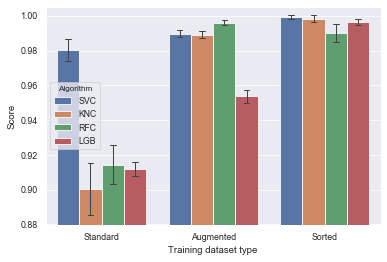

In [3]:
ax = sns.barplot(x='Training dataset type', y='Score', hue='Algorithm', data=results, ci=100, capsize=.05, errwidth=1)
#ax.despine(left=True)
#ax.fig.get_axes()[0].legend(loc='upper left')
ax.set(ylim=(0.88, 1.005))
#ax.figure.savefig('model_comparison.pdf')

## Training and testing times

In [18]:
training_time = np.array([2.64, 1*3600+53*60+50.24, 0.77,
                          0.11, 45.48, 0.10, 
                          13.52, 5*3600+9*60+18.71, 0.90,
                          0.80, 10.33, 0.64])
testing_time = np.array([12*60+47.23, 3*60+9.20, 
                         4*3600+39.05, 1*3600+23*60+32.29,
                         6*60+44.65, 3*60+26.80, 
                         16.33, 9.79])

# Training time DataFrame
t1 = pd.DataFrame()
t1['Algorithm'] = ['SVC', 'SVC', 'SVC',
                   'KNC', 'KNC', 'KNC',
                   'RFC', 'RFC', 'RFC',
                   'LGB', 'LGB', 'LGB']
t1['Training dataset type'] = ['Standard', 'Augmented', 'Sorted',
                               'Standard', 'Augmented', 'Sorted',
                               'Standard', 'Augmented', 'Sorted',
                               'Standard', 'Augmented', 'Sorted']
t1['Class'] = ['Training', 'Training', 'Training',
               'Training', 'Training', 'Training',
               'Training', 'Training', 'Training',
               'Training', 'Training', 'Training']
t1['Training time [s]'] = training_time
t1['Time [s]'] = training_time

# Testing time DataFrame
t2 = pd.DataFrame()
t2['Algorithm'] = ['SVC', 'SVC',
                   'KNC', 'KNC',
                   'RFC', 'RFC',
                   'LGB', 'LGB']
t2['Training dataset type'] = ['Standard and augmented', 'Sorted',
                               'Standard and augmented', 'Sorted',
                               'Standard and augmented', 'Sorted',
                               'Standard and augmented', 'Sorted']
t2['Class'] = ['Testing', 'Testing',
               'Testing', 'Testing',
               'Testing', 'Testing',
               'Testing', 'Testing']
t2['Testing time [s]'] = testing_time
t2['Time [s]'] = testing_time

# Final DataFrame
times = pd.concat([t1, t2])
times.index = range(len(times.index))

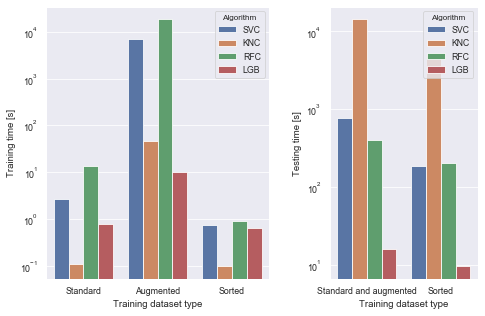

In [36]:
sns.set_context('paper')

plt.figure(figsize=(8,5))
gridspec.GridSpec(1,60)

plt.subplot2grid((1,60), (0,0), colspan=30, rowspan=1)
ax = sns.barplot(x='Training dataset type', y='Training time [s]', hue='Algorithm', data=t1)
#ax.despine(left=True)
#ax.fig.get_axes()[0].legend(loc='upper left')
#ax.set(ylim=(0.88, 1.005))
ax.set_yscale("log")
#ax.figure.savefig('training_times.pdf')

plt.subplot2grid((1,60), (0,38), colspan=20, rowspan=1)
ax = sns.barplot(x='Training dataset type', y='Testing time [s]', hue='Algorithm', data=t2)
#ax.despine(left=True)
#ax.fig.get_axes()[0].legend(loc='upper left')
#ax.set(ylim=(0.88, 1.005))
ax.set_yscale("log")
#ax.figure.savefig('testing_times.pdf')

#plt.savefig('times.pdf')

## Real-life test

In [39]:
standard_time = np.array([26*60+27.21, 38*60+22.22,
                          6*3600*24+18*3600+20*60+54.57, 6*3600*24+18*3600+46*60+23.87,
                          6*3600*24+19*3600+29*60+5.18, 6*3600*24+20*3600+9*60+27.41,
                          14*60+32.23, 27*60+43.87])
sorted_time = np.array([8*60+17.89, 21*60+8.05, 
                        6*3600*24+18*3600+43*60+17.68, 6*3600*24+19*3600+13*60+18.17,
                        6*3600*24+19*3600+19*60+5.91, 6*3600*24+19*3600+58*60+32.62,
                        13*60+42.72, 27*60+59.18])

# Standard RLt DataFrame
rl1 = pd.DataFrame()
rl1['Algorithm'] = ['SVC', 'SVC',
                    'KNC', 'KNC',
                    'RFC', 'RFC',
                    'LGB', 'LGB']
rl1['Type'] = ['Model time', 'Total time',
               'Model time', 'Total time',
               'Model time', 'Total time',
               'Model time', 'Total time']
rl1['Training dataset type'] = ['Standard and augmented', 'Standard and augmented',
                                'Standard and augmented', 'Standard and augmented',
                                'Standard and augmented', 'Standard and augmented',
                                'Standard and augmented', 'Standard and augmented',]
rl1['Time [s]'] = standard_time

# Sorted RLt DataFrame
rl2 = pd.DataFrame()
rl2['Algorithm'] = ['SVC', 'SVC',
                    'KNC', 'KNC',
                    'RFC', 'RFC',
                    'LGB', 'LGB']
rl2['Type'] = ['Model time', 'Total time',
               'Model time', 'Total time',
               'Model time', 'Total time',
               'Model time', 'Total time']
rl2['Training dataset type'] = ['Sorted', 'Sorted',
                           'Sorted', 'Sorted',
                           'Sorted', 'Sorted',
                           'Sorted', 'Sorted',]
rl2['Time [s]'] = sorted_time

# Final DataFrame
rl = pd.concat([rl1, rl2])
rl.index = range(len(rl.index))

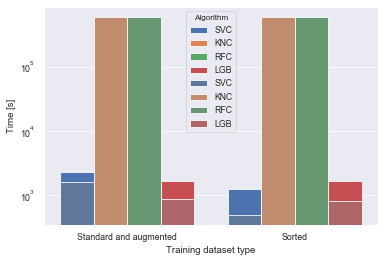

In [48]:
plt.figure()

ax1 = sns.barplot(x='Training dataset type', y='Time [s]', hue='Algorithm', data=rl.query('Type == "Total time"'), saturation=1)
ax2 = sns.barplot(x='Training dataset type', y='Time [s]', hue='Algorithm', data=rl.query('Type == "Model time"'), saturation=0.6)

ax1.set_yscale("log")
ax2.set_yscale("log")

#plt.savefig('real-life.pdf')

In [43]:
rl

,Algorithm,Type,Training dataset type,Time [s]
0,SVC,Model time,Standard and augmented,1587.21
1,SVC,Total time,Standard and augmented,2302.22
2,KNC,Model time,Standard and augmented,584454.57
3,KNC,Total time,Standard and augmented,585983.87
4,RFC,Model time,Standard and augmented,588545.18
5,RFC,Total time,Standard and augmented,590967.41
6,LGB,Model time,Standard and augmented,872.23
7,LGB,Total time,Standard and augmented,1663.87
8,SVC,Model time,Sorted,497.89
9,SVC,Total time,Sorted,1268.05
